<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/camazure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install git+https://github.com/advcloud/colablib.git

  Cloning https://github.com/advcloud/colablib.git to /tmp/pip-req-build-haalqajh
  Running command git clone -q https://github.com/advcloud/colablib.git /tmp/pip-req-build-haalqajh
     |████████████████████████████████| 62 kB 593 kB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 41 kB 386 kB/s 
  Created wheel for colablib: filename=colablib-1.0-py3-none-any.whl size=1360 sha256=04529218cfc22ce7d7249614ae3c398927b18676495c437af441a4c4632e4186
  Stored in directory: /tmp/pip-ephem-wheel-cache-e8citwgm/wheels/b5/c2/ac/7ed0bb567b972508dad7afde6343ba76aab2525c698c5770d2
Successfully built colablib


In [4]:
%cd /content/drive/MyDrive/Github/tmp

/content/drive/MyDrive/Github/tmp


In [5]:
!git clone https://github.com/advcloud/colablib1.git

Cloning into 'colablib1'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [6]:
%cd colablib1

/content/drive/MyDrive/Github/tmp/colablib1


In [7]:
import functions1

In [16]:
prediction_key = ""
ENDPOINT1 = ""
publish_iteration_name = "detectModel"
project_id = ""

In [17]:
prediction_credentials = functions1.ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = functions1.CustomVisionPredictionClient(ENDPOINT1, prediction_credentials)

In [ ]:
import io

In [63]:
def show_inference_from_webcam(total_iter=10):
  """Runs inference directly on your webcam for total_iter times!
  """
  vid = functions1.videoGrabber(showVideo=False)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  try:
    n_iter = 0
    while n_iter <= total_iter:
      n_iter += 1
      im = functions1.Image.open("../test.jpg")
      #im = functions1.cv2.imread("../test.jpg")
      #print(im.size[0])
      print(im.size)
      img = functions1.cv2.cvtColor(functions1.np.asarray(im),functions1.cv2.COLOR_RGB2BGR) 
      is_success, im_buf_arr = functions1.cv2.imencode(".jpg", img)
      byte_im = im_buf_arr.tobytes()

      results = predictor.detect_image_with_no_store(project_id, publish_iteration_name,byte_im )
      for prediction in results.predictions:
          if prediction.probability > 0.2:
              print("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))
              bbox = prediction.bounding_box
              draw = functions1.ImageDraw.Draw(im)
              draw.rectangle([int(bbox.left * im.size[0]), int(bbox.top * im.size[1]), int((bbox.left + bbox.width) * im.size[0]), int((bbox.top + bbox.height) * im.size[1])],outline='red',width=5)

      image_np = functions1.np.array(im)
      
      functions1.imshow(image_np)
  finally:
    vid(stop=True)

(500, 300)
	Squirrel: 23.05%


<IPython.core.display.Javascript object>


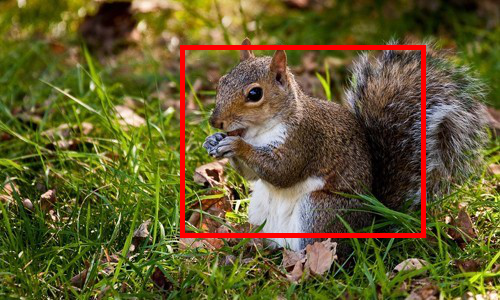

<IPython.core.display.Javascript object>

(500, 300)
	Squirrel: 23.05%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(500, 300)
	Squirrel: 23.05%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(500, 300)
	Squirrel: 23.05%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
show_inference_from_webcam(total_iter=3)